# Data exploration

In [1]:
import h5py
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import norm

from ariel import *

In [2]:
rng = np.random.default_rng()
i = rng.integers(N_ANNOTATED)

## Spectra

In [3]:
spectrafile = h5py.File("data/train/spectra.hdf5", "r")
grp = spectrafile["Planet_" + str(i)]
grp.keys()

<KeysViewHDF5 ['instrument_noise', 'instrument_spectrum', 'instrument_width', 'instrument_wlgrid']>

In [4]:
spectrum = grp["instrument_spectrum"][:]
noise = grp["instrument_noise"][:]
width = grp["instrument_width"][:]
wlgrid = grp["instrument_wlgrid"][:]

In [5]:
spectrum.dtype, spectrum.shape

(dtype('float64'), (52,))

In [6]:
noise.dtype, noise.shape

(dtype('float64'), (52,))

In [7]:
width.dtype, width.shape

(dtype('float64'), (52,))

In [8]:
wlgrid.dtype, wlgrid.shape

(dtype('float64'), (52,))

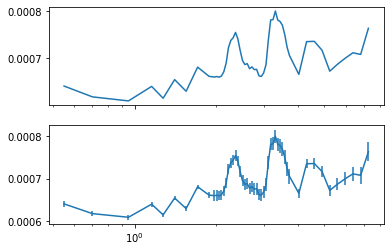

In [9]:
fig, (ax1, ax2) = plt.subplots(nrows=2, sharex=True)
ax1.plot(wlgrid, spectrum)
ax2.errorbar(wlgrid, spectrum, noise)
ax2.set_xscale("log")

In [10]:
# reverse order?
wlgrid

array([7.2755592 , 6.81373911, 6.3812333 , 5.97618103, 5.59683967,
       5.24157722, 4.90886524, 4.59727234, 4.30545796, 4.03216667,
       3.72344897, 3.65008232, 3.57816128, 3.50765736, 3.43854266,
       3.37078978, 3.30437191, 3.23926272, 3.17543645, 3.11286781,
       3.05153202, 2.99140478, 2.93246229, 2.8746812 , 2.81803862,
       2.76251213, 2.70807972, 2.65471985, 2.60241139, 2.5511336 ,
       2.50086619, 2.45158925, 2.40328325, 2.35592908, 2.30950797,
       2.26400154, 2.21939176, 2.17566098, 2.13279186, 2.09076743,
       2.04957106, 2.00918641, 1.9695975 , 1.88361302, 1.70849254,
       1.5496531 , 1.40558104, 1.27490344, 1.156375  , 0.95      ,
       0.7       , 0.55      ])

In [11]:
N_WAVES = wlgrid.shape[0]
N_WAVES

52

In [12]:
width

array([0.47747067, 0.44716295, 0.41877904, 0.39219681, 0.36730191,
       0.34398722, 0.32215244, 0.30170364, 0.28255283, 0.26461764,
       0.07410399, 0.07264385, 0.07121248, 0.06980931, 0.06843379,
       0.06708537, 0.06576353, 0.06446773, 0.06319746, 0.06195222,
       0.06073151, 0.05953486, 0.05836179, 0.05721183, 0.05608453,
       0.05497945, 0.05389614, 0.05283417, 0.05179313, 0.0507726 ,
       0.04977218, 0.04879147, 0.04783008, 0.04688764, 0.04596377,
       0.0450581 , 0.04417028, 0.04329995, 0.04244677, 0.0416104 ,
       0.04079051, 0.03998678, 0.03919888, 0.18409541, 0.16697996,
       0.15145575, 0.13737483, 0.12460302, 0.11301861, 0.30767045,
       0.20416667, 0.10083333])

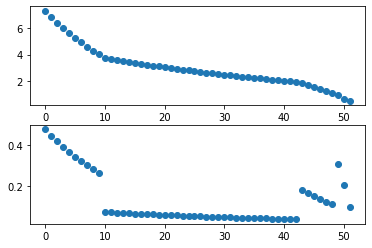

In [13]:
fig, (ax1, ax2) = plt.subplots(nrows=2)
ax1.scatter(np.arange(N_WAVES), wlgrid)
ax2.scatter(np.arange(N_WAVES), width)

## Auxillary table

In [14]:
auxiliary = pd.read_csv(
    "data/train/auxiliary_table.csv",
    index_col="planet_ID").iloc[:N_ANNOTATED]
auxiliary

,star_distance,star_mass_kg,star_radius_m,star_temperature,planet_mass_kg,planet_orbital_period,planet_distance,planet_radius_m,planet_surface_gravity
planet_ID,,,,,,,,,
0,100.0510,1.531871e+30,612216000.0,5053.0,4.994682e+25,3.646200,0.042501,1.751739e+07,10.389141
1,28.2938,1.536643e+30,542646000.0,5071.0,3.040857e+25,16.201656,0.114991,1.309706e+07,11.315104
2,258.8930,1.888989e+30,688743000.0,5416.0,9.850620e+25,88.406553,0.381830,2.628654e+07,9.099284
3,1010.2800,2.087830e+30,751356000.0,5900.0,1.954940e+28,3.575320,0.046513,7.040038e+07,251.764117
4,1070.1700,2.028178e+30,953109000.0,5866.0,5.997680e+25,31.588900,0.196877,1.964499e+07,9.919505
...,...,...,...,...,...,...,...,...,...
21983,330.7390,2.028178e+30,681786000.0,5784.0,6.092580e+25,41.474219,0.236061,1.978481e+07,9.934539
21984,39.0341,1.491307e+30,507861000.0,4813.0,1.070092e+26,17.667000,0.120624,1.167514e+07,50.108070
21985,123.6760,1.173162e+30,396549000.0,3745.0,1.992900e+25,11.332000,0.082819,1.020701e+07,12.209535


In [15]:
auxiliary_test = pd.read_csv("data/test/auxiliary_table.csv", index_col="planet_ID")
auxiliary_test

,star_distance,star_mass_kg,star_radius_m,star_temperature,planet_mass_kg,planet_orbital_period,planet_distance,planet_radius_m,planet_surface_gravity
planet_ID,,,,,,,,,
0,982.7680,2.682613e+30,1.043550e+09,6531.0,2.122998e+27,13.705350,0.123845,9.846809e+07,13.975548
1,843.5240,2.551378e+30,1.001808e+09,6373.0,1.803828e+27,3.949138,0.053132,9.556848e+07,12.605966
2,1139.3200,3.272923e+30,3.798522e+09,7315.0,5.394261e+27,1.198880,0.026077,1.281870e+08,20.953388
3,463.1560,3.594250e+30,2.101014e+09,7719.0,5.135037e+26,9.150500,0.104295,6.954126e+07,6.777489
4,38.5653,1.533197e+30,5.583918e+08,5058.0,4.600568e+25,4.137438,0.046251,1.668889e+07,10.543062
...,...,...,...,...,...,...,...,...,...
795,905.8250,1.988410e+30,1.057464e+09,5710.0,2.011880e+25,6.158270,0.065757,1.027692e+07,12.158689
796,374.6150,1.570844e+30,5.078610e+08,4825.0,2.239640e+25,14.820100,0.109165,1.097603e+07,11.865833
797,1377.6100,2.167367e+30,7.096140e+08,6208.0,6.339320e+25,103.427002,0.443817,2.027419e+07,9.843873


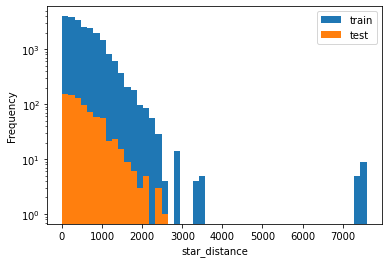

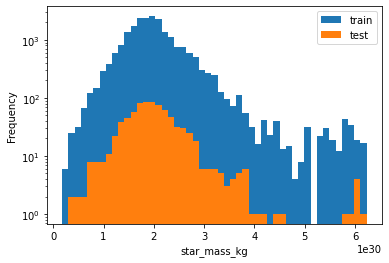

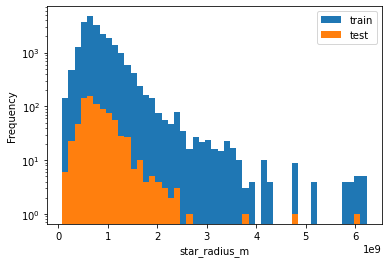

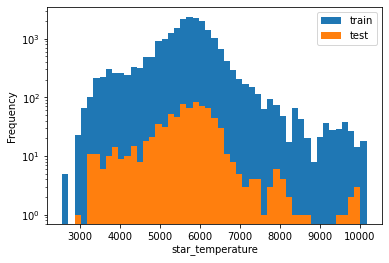

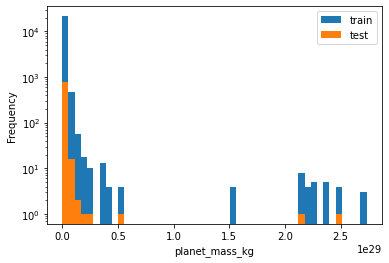

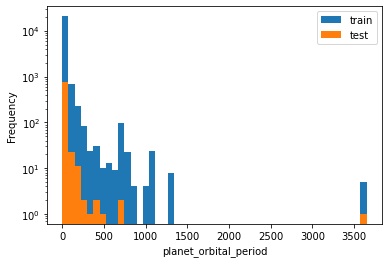

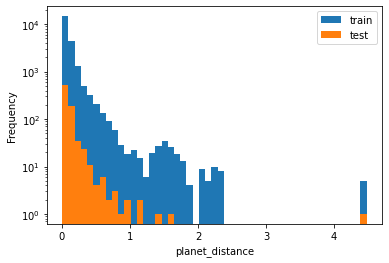

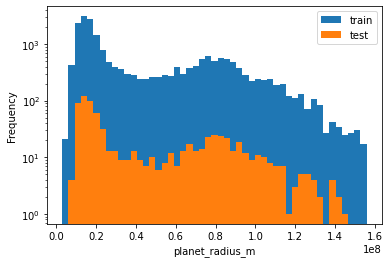

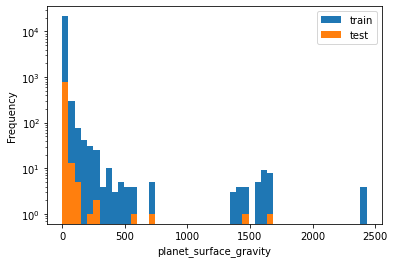

In [16]:
for column in auxiliary.columns:
    fig, ax = plt.subplots()
    ax.set_xlabel(column)
    edges = np.linspace(auxiliary[column].min(), auxiliary[column].max())
    auxiliary[column].plot.hist(ax=ax, bins=edges, label="train")
    auxiliary_test[column].plot.hist(ax=ax, bins=edges, label="test")
    ax.set_yscale("log")
    ax.legend()

## Forward model parameter table

In [17]:
fm_parameter = pd.read_csv(
    "data/train/ground_truth/fm_parameter_table.csv",
    index_col="planet_ID").iloc[:N_ANNOTATED]
fm_parameter

,planet_temp,log_H2O,log_CO2,log_CH4,log_CO,log_NH3
planet_ID,,,,,,
0,1108.725067,-6.484809,-7.016512,-3.294729,-3.351913,-6.955828
1,636.858130,-8.829193,-8.603965,-5.501124,-4.799371,-6.020019
2,420.527609,-6.626830,-6.420932,-6.755727,-5.318471,-4.695118
3,1370.906116,-7.639372,-5.877303,-4.476840,-5.200010,-6.240726
4,746.170076,-4.172605,-6.899335,-6.360434,-4.140252,-8.896858
...,...,...,...,...,...,...
21983,568.279821,-7.843293,-7.253572,-7.395347,-5.899309,-5.672948
21984,570.943534,-5.013524,-4.875237,-3.845157,-3.377943,-6.271518
21985,473.760382,-7.166548,-8.755334,-7.775022,-4.570568,-7.281749


Text(0.5, 0, 'Planet temperature')

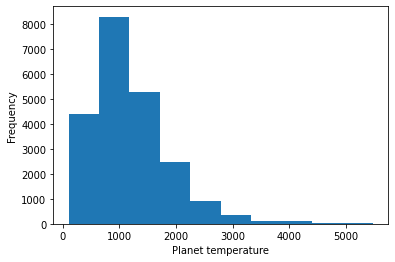

In [18]:
ax = fm_parameter["planet_temp"].plot.hist()
ax.set_xlabel("Planet temperature")

Text(0.5, 0, 'log H$_2$O')

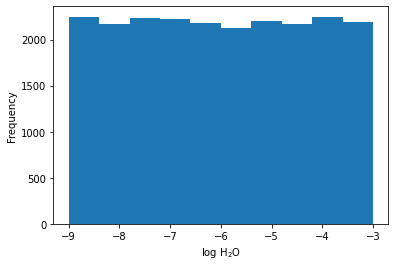

In [19]:
ax = fm_parameter["log_H2O"].plot.hist()
ax.set_xlabel("log H$_2$O")

Text(0.5, 0, 'log CO$_2$')

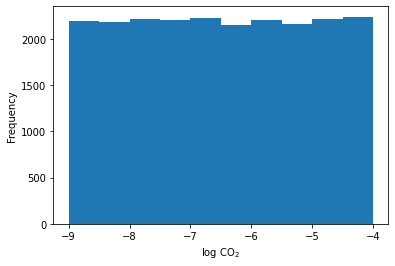

In [20]:
ax = fm_parameter["log_CO2"].plot.hist()
ax.set_xlabel("log CO$_2$")

Text(0.5, 0, 'log CH$_4$')

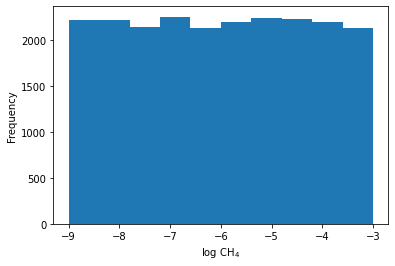

In [21]:
ax = fm_parameter["log_CH4"].plot.hist()
ax.set_xlabel("log CH$_4$")

Text(0.5, 0, 'log CO')

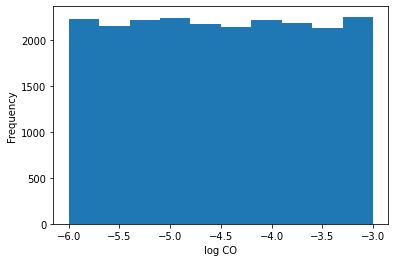

In [22]:
ax = fm_parameter["log_CO"].plot.hist()
ax.set_xlabel("log CO")

Text(0.5, 0, 'log NH$_3$')

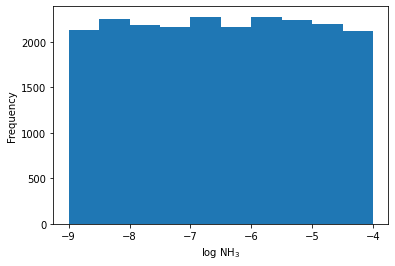

In [23]:
ax = fm_parameter["log_NH3"].plot.hist()
ax.set_xlabel("log NH$_3$")

## Quartiles table

In [24]:
quartiles = pd.read_csv("data/train/ground_truth/quartiles_table.csv", index_col="planet_ID")
quartiles

,T_q1,T_q2,T_q3,log_H2O_q1,log_H2O_q2,log_H2O_q3,log_CO2_q1,log_CO2_q2,log_CO2_q3,log_CH4_q1,log_CH4_q2,log_CH4_q3,log_CO_q1,log_CO_q2,log_CO_q3,log_NH3_q1,log_NH3_q2,log_NH3_q3
planet_ID,,,,,,,,,,,,,,,,,,
0,1096.754060,1109.490687,1122.716570,-10.884421,-8.867972,-6.684767,-10.153066,-7.434079,-6.823955,-3.346453,-3.291427,-3.229520,-4.082412,-3.399877,-3.042125,-11.019125,-8.890987,-6.977170
1,616.072976,636.977475,657.582228,-11.095211,-9.323549,-7.452824,-10.785395,-9.247521,-8.291703,-5.672253,-5.513984,-5.337995,-5.203368,-4.816855,-4.414735,-6.255204,-6.029390,-5.839559
2,411.059375,420.392211,429.156294,-10.450308,-7.773855,-6.522569,-6.884896,-6.449624,-6.060706,-8.724523,-7.086556,-6.492432,-5.972764,-5.390598,-4.929774,-4.773786,-4.668049,-4.556866
3,1357.964612,1382.813499,1409.892455,-10.882759,-8.827417,-6.804879,-6.073258,-5.891995,-5.733862,-4.529318,-4.478272,-4.430260,-10.659858,-7.749673,-5.096800,-10.860119,-7.922047,-6.382086
4,737.588375,746.177998,756.234493,-4.254871,-4.172825,-4.098340,-7.180686,-6.927282,-6.680215,-6.618038,-6.397635,-6.210865,-4.543197,-4.166813,-3.835200,-11.185112,-9.489310,-7.766874
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91387,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
91388,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
91389,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Traces

In [25]:
tracefile = h5py.File("data/train/ground_truth/traces.hdf5", "r")
tracegrp = tracefile["Planet_" + str(i)]
tracegrp.keys()

<KeysViewHDF5 ['tracedata', 'weights']>

In [26]:
tracegrp["tracedata"]

<HDF5 dataset "tracedata": shape (2941, 6), type "<f8">

In [27]:
tracegrp.attrs["ID"], tracegrp.attrs["target_order"]

(21543,
 array(['T', 'log_H2O', 'log_CO2', 'log_CH4', 'log_CO', 'log_NH3'],
       dtype=object))

In [28]:
tracedata = tracegrp["tracedata"][:]
tracedata.shape, tracedata.dtype

((2941, 6), dtype('float64'))

In [29]:
weights = tracegrp["weights"][:]
weights.shape, weights.dtype

((2941,), dtype('float64'))

In [30]:
fm_parameter.loc[i, "planet_temp"], quartiles.loc[i, ["T_q1", "T_q2", "T_q3"]]

(686.9539890215392,
 T_q1    673.850539
 T_q2    688.911044
 T_q3    703.664993
 Name: 21543, dtype: float64)

In [31]:
mean = (tracedata[:, 0] @ weights)
var = (weights @ ((tracedata[:, 0] - mean) ** 2))
std = np.sqrt(var)
weights.sum(), mean, var, std

(1.0000000000000009, 688.9644158770689, 229.7216892518725, 15.156572477043499)

In [32]:
np.square(tracedata.T - weights) @ weights

array([4.74900474e+05, 6.93077004e+01, 3.86033348e+01, 2.08550364e+01,
       9.68618083e+00, 4.98918408e+01])

In [33]:
tracedata[:, 0].min()

432.97891283089706

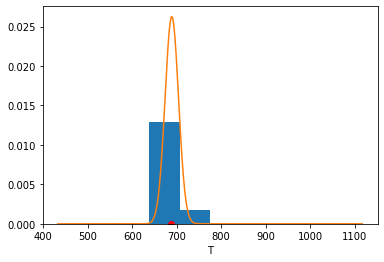

In [34]:
fig, ax = plt.subplots()
ax.hist(tracedata[:, 0], density=True, weights=weights)
ax.set_xlabel("T")
x = np.linspace(tracedata[:, 0].min(), tracedata[:, 0].max(), num=256)
y = norm.pdf(x, loc=mean, scale=std)
ax.plot(x, y)
ax.scatter(fm_parameter.loc[i, "planet_temp"], 0, color="r")

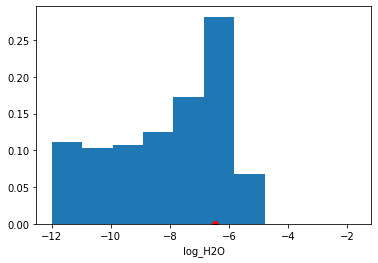

In [35]:
fig, ax = plt.subplots()
ax.hist(tracedata[:, 1], density=True, weights=weights)
ax.set_xlabel("log_H2O")
ax.scatter(fm_parameter.loc[i, "log_H2O"], 0, color="r")

In [36]:
fm_parameter.loc[i, "log_H2O"], quartiles.loc[i, ["log_H2O_q1", "log_H2O_q2", "log_H2O_q3"]]

(-6.471968958056009,
 log_H2O_q1   -10.594671
 log_H2O_q2    -7.583746
 log_H2O_q3    -6.138275
 Name: 21543, dtype: float64)

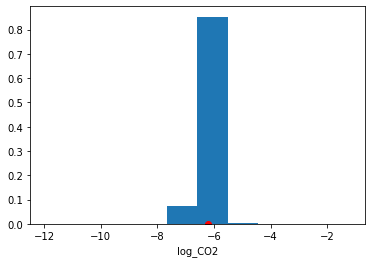

In [37]:
fig, ax = plt.subplots()
ax.hist(tracedata[:, 2], density=True, weights=weights)
ax.set_xlabel("log_CO2")
ax.scatter(fm_parameter.loc[i, "log_CO2"], 0, color="r")

In [38]:
fm_parameter.loc[i, "log_CO2"], quartiles.loc[i, ["log_CO2_q1", "log_CO2_q2", "log_CO2_q3"]]

(-6.208586863905483,
 log_CO2_q1   -6.477114
 log_CO2_q2   -6.213217
 log_CO2_q3   -5.934100
 Name: 21543, dtype: float64)

In [39]:
mean = (tracedata[:, 3] @ weights)
var = (weights @ ((tracedata[:, 3] - mean) ** 2))
std = np.sqrt(var)
weights.sum(), mean, var, std

(1.0000000000000009,
 -4.564488042730913,
 0.012435616620334223,
 0.11151509593025612)

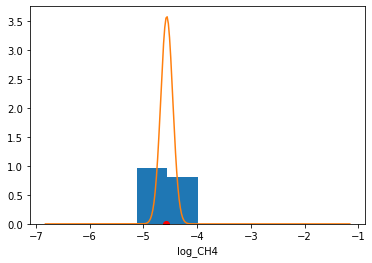

In [40]:
fig, ax = plt.subplots()
ax.hist(tracedata[:, 3], density=True, weights=weights)
ax.set_xlabel("log_CH4")
x = np.linspace(tracedata[:, 3].min(), tracedata[:, 3].max(), num=256)
y = norm.pdf(x, loc=mean, scale=std)
ax.plot(x, y)
ax.scatter(fm_parameter.loc[i, "log_CH4"], 0, color="r")

In [41]:
fm_parameter.loc[i, "log_CH4"], quartiles.loc[i, ["log_CH4_q1", "log_CH4_q2", "log_CH4_q3"]]

(-4.570921812549756,
 log_CH4_q1   -4.675909
 log_CH4_q2   -4.566748
 log_CH4_q3   -4.450222
 Name: 21543, dtype: float64)

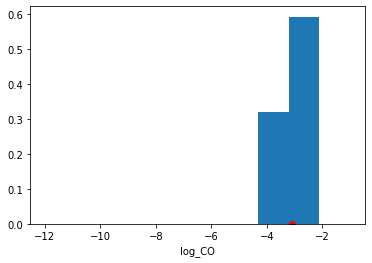

In [42]:
fig, ax = plt.subplots()
ax.hist(tracedata[:, 4], density=True, weights=weights)
ax.set_xlabel("log_CO")
ax.scatter(fm_parameter.loc[i, "log_CO"], 0, color="r")

In [43]:
fm_parameter.loc[i, "log_CO"], quartiles.loc[i, ["log_CO_q1", "log_CO_q2", "log_CO_q3"]]

(-3.098198716323221,
 log_CO_q1   -3.389337
 log_CO_q2   -3.094289
 log_CO_q3   -2.814613
 Name: 21543, dtype: float64)

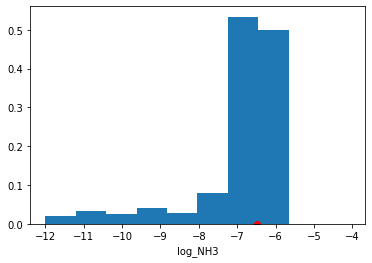

In [44]:
fig, ax = plt.subplots()
ax.hist(tracedata[:, 5], density=True, weights=weights)
ax.set_xlabel("log_NH3")
ax.scatter(fm_parameter.loc[i, "log_NH3"], 0, color="r")

In [45]:
fm_parameter.loc[i, "log_NH3"], quartiles.loc[i, ["log_NH3_q1", "log_NH3_q2", "log_NH3_q3"]]

(-6.48549127215213,
 log_NH3_q1   -7.386212
 log_NH3_q2   -6.552579
 log_NH3_q3   -6.260334
 Name: 21543, dtype: float64)